# TAKE HOME EXERCISE
1. Dataset yang digunakan adalah Admission_Predict.csv. X = 'GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', Y = Chance of Admit

2. Buat beberapa percobaan untuk menemukan model MLR terbaik

3. Urutan percobaan 1 (train 80% test 20%):

    1.a) Variabel independent tidak ada intervensi sama sekali
    
    1.b) Handling outlier
    
    1.c) Scalling
    
4. Urutan percobaan 2 (train 90% test 10%):

    2.a) Variabel independent tidak ada intervensi sama sekali
    
    2.b) Handle outlier
    
    2.c) Scalling  
    
5. Di setiap percobaan tampilkan MAE, MSE, dan RMSE + Perkembangan secara persentase

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
df_adm = pd.read_csv('Admission_Predict.csv').drop(['Serial No.'], axis = 1)

In [3]:
df_adm.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
df_adm.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'}, inplace=True)

In [5]:
df_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df_adm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [7]:
df_adm.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df_adm.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


## Train 80%

### a) No Intervention

#### Split dependent (y) & independent (x) variables

In [9]:
x = df_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y = df_adm['Chance of Admit'].values

#### Split & Training Model

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [11]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.00207128  0.00195523  0.00657193 -0.00472847  0.02118445  0.12463177
  0.02414366]
-1.304713830082413


In [12]:
x_columns = df_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_, x_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.002071
TOEFL Score,0.001955
University Rating,0.006572
SOP,-0.004728
LOR,0.021184
CGPA,0.124632
Research,0.024144


#### Y Predict

In [13]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicted' : y_pred.flatten()})
df.head()

,Actual,Predicted
0,0.71,0.697913
1,0.70,0.693439
2,0.79,0.778827
3,0.73,0.615774
4,0.72,0.722820


#### Visualize Y Actual & Y Predict

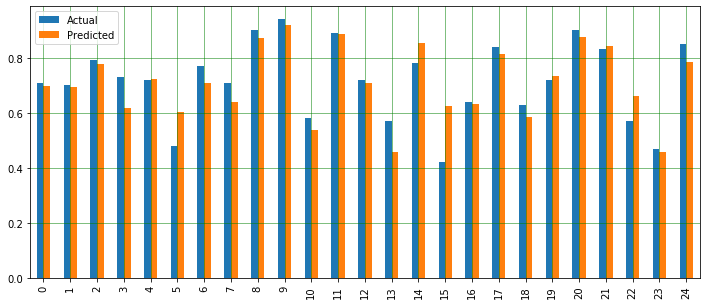

In [14]:
df.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [15]:
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
R2 = round(metrics.r2_score(y_test, y_pred), 2)
mean_target = df_adm['Chance of Admit'].mean()

In [16]:
print('Mean Absolute Error :', MAE)
print('Mean Squared Error :', MSE)
print('Root Mean Squared Error :', RMSE)

Mean Absolute Error : 0.05008754843817953
Mean Squared Error : 0.004805156569785205
Root Mean Squared Error : 0.06931923665033542


In [17]:
print('Percentage of Error by MAE', round(MAE / mean_target * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE / mean_target * 100, 2), '%')
print('R2 Score:', R2)

Percentage of Error by MAE 6.91 %
Percentage of Error by RMSE 9.57 %
R2 Score: 0.74


### b) Handling Outlier

#### Find & Visualize Outliers

In [18]:
df1_adm = df_adm.copy()

In [19]:
Q1 = df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.25)
Q3 = df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR 

In [20]:
df1_adm_outdrop = df1_adm[~((df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] < lower) | (df1_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] > upper))].dropna()

In [21]:
df1_adm_outdrop.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Split dependent and Independent

In [22]:
x1 = df1_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y1 = df1_adm_outdrop['Chance of Admit'].values

#### Split & Training Model

In [23]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.8, random_state=0)
regressor = LinearRegression()  
regressor.fit(x1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [24]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.00226674  0.00243695  0.00704011 -0.00151491  0.0242344   0.10803877
  0.02603878]
-1.300247247922095


In [25]:
x1_columns = df1_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_, x1_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.002267
TOEFL Score,0.002437
University Rating,0.007040
SOP,-0.001515
LOR,0.024234
CGPA,0.108039
Research,0.026039


#### Y Predict

In [26]:
y1_pred = regressor.predict(x1_test)
df1 = pd.DataFrame({'Actual' : y1_test.flatten(), 'Predicted' : y1_pred.flatten()})
df1.head()

,Actual,Predicted
0,0.61,0.782578
1,0.79,0.791625
2,0.72,0.782162
3,0.46,0.441213
4,0.58,0.532352


#### Visualize Y Actual & Y Predict

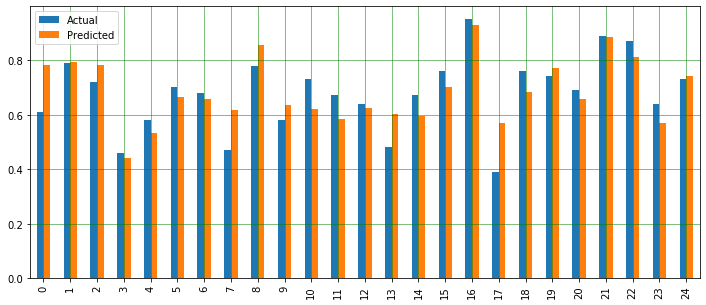

In [27]:
df1.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [28]:
MAE1 = metrics.mean_absolute_error(y1_test, y1_pred)
MSE1 = metrics.mean_squared_error(y1_test, y1_pred)
RMSE1 = np.sqrt(metrics.mean_squared_error(y1_test, y1_pred))
R2_1 = round(metrics.r2_score(y1_test, y1_pred), 2)
mean_target1 = df1_adm_outdrop['Chance of Admit'].mean()

In [29]:
print('Mean Absolute Error :', MAE1)
print('Mean Squared Error :', MSE1)
print('Root Mean Squared Error :', RMSE1)

Mean Absolute Error : 0.05175974607086159
Mean Squared Error : 0.004624564270521577
Root Mean Squared Error : 0.06800414892138255


In [30]:
print('Percentage of Error by MAE', round(MAE1 / mean_target1 * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE1 / mean_target1 * 100, 2), '%')
print('R2 Score:', R2_1)

Percentage of Error by MAE 7.13 %
Percentage of Error by RMSE 9.37 %
R2 Score: 0.73


### c) Scaling

In [31]:
df2_adm = df1_adm_outdrop.copy()

In [32]:
df2_adm['GRE Scld'] = MinMaxScaler().fit_transform(df2_adm[['GRE Score']])
df2_adm['TOEFL Scld'] = MinMaxScaler().fit_transform(df2_adm[['TOEFL Score']])
df2_adm['University Rating Scld'] = MinMaxScaler().fit_transform(df2_adm[['University Rating']])
df2_adm['SOP Scld'] = MinMaxScaler().fit_transform(df2_adm[['SOP']])
df2_adm['LOR Scld'] = MinMaxScaler().fit_transform(df2_adm[['LOR']])
df2_adm['CGPA Scld'] = MinMaxScaler().fit_transform(df2_adm[['CGPA']])
df2_adm['Research Scld'] = MinMaxScaler().fit_transform(df2_adm[['Research']])

In [33]:
df2_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Scld,TOEFL Scld,University Rating Scld,SOP Scld,LOR Scld,CGPA Scld,Research Scld
0,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0


#### Split dependent and Independent

In [34]:
x2 = df2_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].values
y2 = df2_adm['Chance of Admit'].values

#### Split & Training Model

In [35]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size=0.8, random_state=0)
regressor = LinearRegression()  
regressor.fit(x2_train, y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [36]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.11333705  0.06823472  0.02816044 -0.00605965  0.08482041  0.29386544
  0.02603878]
0.4010633677194819


In [37]:
x2_columns = df2_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].columns

coeff_df = pd.DataFrame(regressor.coef_, x2_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Scld,0.113337
TOEFL Scld,0.068235
University Rating Scld,0.028160
SOP Scld,-0.006060
LOR Scld,0.084820
CGPA Scld,0.293865
Research Scld,0.026039


#### Y Predict

In [38]:
y2_pred = regressor.predict(x2_test)
df2 = pd.DataFrame({'Actual' : y2_test.flatten(), 'Predicted' : y2_pred.flatten()})
df2.head()

,Actual,Predicted
0,0.61,0.782578
1,0.79,0.791625
2,0.72,0.782162
3,0.46,0.441213
4,0.58,0.532352


#### Visualize Y Actual & Y Predict

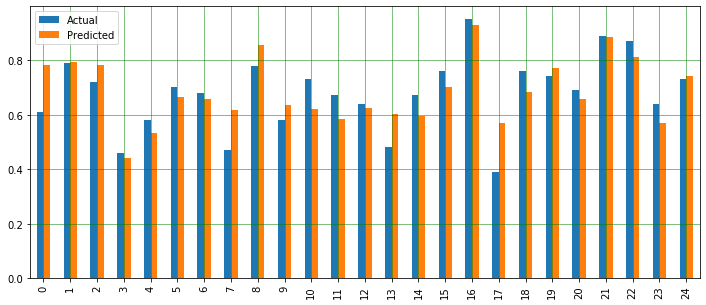

In [39]:
df2.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [40]:
MAE2 = metrics.mean_absolute_error(y2_test, y2_pred)
MSE2 = metrics.mean_squared_error(y2_test, y2_pred)
RMSE2 = np.sqrt(metrics.mean_squared_error(y2_test, y2_pred))
R2_2 = round(metrics.r2_score(y2_test, y2_pred), 2)
mean_target2 = df2_adm['Chance of Admit'].mean()

In [41]:
print('Mean Absolute Error :', MAE2)
print('Mean Squared Error :', MSE2)
print('Root Mean Squared Error :', RMSE2)

Mean Absolute Error : 0.051759746070861756
Mean Squared Error : 0.004624564270521584
Root Mean Squared Error : 0.06800414892138261


In [42]:
print('Percentage of Error by MAE', round(MAE2 / mean_target2 * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE2 / mean_target2 * 100, 2), '%')
print('R2 Score:', R2_2)

Percentage of Error by MAE 7.13 %
Percentage of Error by RMSE 9.37 %
R2 Score: 0.73


## Train 90%

### a) No Intervention

In [43]:
df3_adm = df_adm.copy()

#### Split dependent and Independent

In [44]:
x3 = df3_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y3 = df3_adm['Chance of Admit'].values

#### Split & Training Model

In [45]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size=0.9, random_state=0)
regressor = LinearRegression()  
regressor.fit(x3_train, y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [46]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.00184368  0.0027815   0.00782288 -0.00537863  0.02146922  0.1214326
  0.02145131]
-1.2944241798749032


In [47]:
x3_columns = df3_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_, x3_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.001844
TOEFL Score,0.002781
University Rating,0.007823
SOP,-0.005379
LOR,0.021469
CGPA,0.121433
Research,0.021451


#### Y Predict

In [48]:
y3_pred = regressor.predict(x3_test)
df3 = pd.DataFrame({'Actual' : y3_test.flatten(), 'Predicted' : y3_pred.flatten()})
df3.head()

,Actual,Predicted
0,0.71,0.702226
1,0.70,0.700589
2,0.79,0.777568
3,0.73,0.618016
4,0.72,0.722818


#### Visualize Y Actual & Y Predict

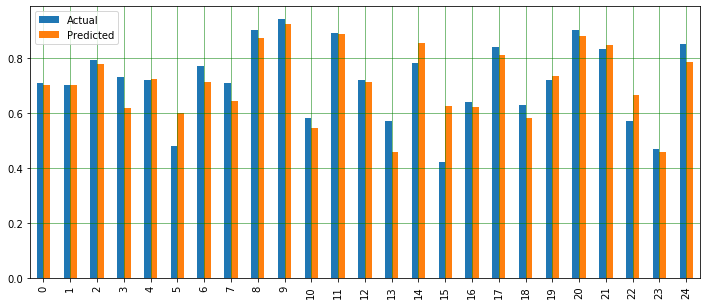

In [49]:
df3.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [50]:
MAE3 = metrics.mean_absolute_error(y3_test, y3_pred)
MSE3 = metrics.mean_squared_error(y3_test, y3_pred)
RMSE3 = np.sqrt(metrics.mean_squared_error(y3_test, y3_pred))
R2_3 = round(metrics.r2_score(y3_test, y3_pred), 2)
mean_target3 = df3_adm['Chance of Admit'].mean()

In [51]:
print('Mean Absolute Error :', MAE3)
print('Mean Squared Error :', MSE3)
print('Root Mean Squared Error :', RMSE3)

Mean Absolute Error : 0.05093626332411956
Mean Squared Error : 0.005290549167338429
Root Mean Squared Error : 0.07273616134591121


In [52]:
print('Percentage of Error by MAE', round(MAE3 / mean_target3 * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE3 / mean_target3 * 100, 2), '%')
print('R2 Score:', R2_3)

Percentage of Error by MAE 7.03 %
Percentage of Error by RMSE 10.04 %
R2 Score: 0.73


### b) Handling Outlier

#### Find & Visualize Outliers

In [53]:
df4_adm = df_adm.copy()

In [54]:
Q1 = df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.25)
Q3 = df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research', 'Chance of Admit']].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR 

In [55]:
df4_adm_outdrop = df4_adm[~((df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] < lower ) | (df4_adm[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']] > upper))].dropna()

In [56]:
df4_adm_outdrop.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


#### Split dependent and independent

In [57]:
x4 = df4_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].values
y4 = df4_adm_outdrop['Chance of Admit'].values

#### Split & Training Model

In [58]:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size=0.9, random_state=0)
regressor = LinearRegression()  
regressor.fit(x4_train, y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [59]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.00224172  0.00280077  0.00591547 -0.0023073   0.02370414  0.10701718
  0.02292509]
-1.3115298025049495


In [60]:
x4_columns = df4_adm_outdrop[['GRE Score', 'TOEFL Score','University Rating', 'SOP', 'LOR', 'CGPA', 'Research']].columns

coeff_df = pd.DataFrame(regressor.coef_, x4_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Score,0.002242
TOEFL Score,0.002801
University Rating,0.005915
SOP,-0.002307
LOR,0.023704
CGPA,0.107017
Research,0.022925


#### Y  Predict

In [61]:
y4_pred = regressor.predict(x4_test)
df4 = pd.DataFrame({'Actual' : y4_test.flatten(), 'Predicted' : y4_pred.flatten()})
df4.head()

,Actual,Predicted
0,0.61,0.788033
1,0.79,0.792861
2,0.72,0.786310
3,0.46,0.445518
4,0.58,0.540818


#### Visualize Y Actual & Y Predict

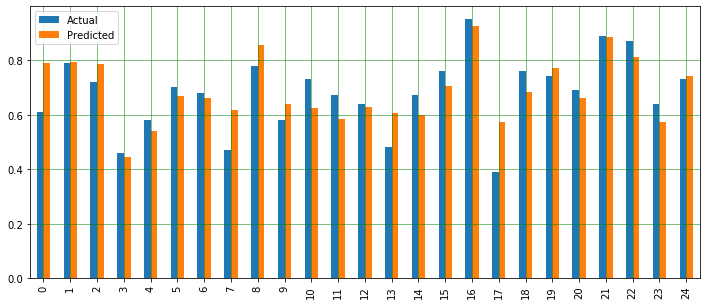

In [62]:
df4.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [63]:
MAE4 = metrics.mean_absolute_error(y4_test, y4_pred)
MSE4 = metrics.mean_squared_error(y4_test, y4_pred)
RMSE4 = np.sqrt(metrics.mean_squared_error(y4_test, y4_pred))
R2_4 = round(metrics.r2_score(y4_test, y4_pred), 2)
mean_target4 = df4_adm_outdrop['Chance of Admit'].mean()

In [64]:
print('Mean Absolute Error :', MAE4)
print('Mean Squared Error :', MSE4)
print('Root Mean Squared Error :', RMSE4)

Mean Absolute Error : 0.05583523547731971
Mean Squared Error : 0.00533626865358252
Root Mean Squared Error : 0.0730497683335308


In [65]:
print('Percentage of Error by MAE', round(MAE4 / mean_target4 * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE4 / mean_target4 * 100, 2), '%')
print('R2 Score:', R2_4)

Percentage of Error by MAE 7.69 %
Percentage of Error by RMSE 10.06 %
R2 Score: 0.7


### c) Scaling

In [66]:
df5_adm = df4_adm_outdrop.copy()

In [67]:
df5_adm['GRE Scld'] = MinMaxScaler().fit_transform(df5_adm[['GRE Score']])
df5_adm['TOEFL Scld'] = MinMaxScaler().fit_transform(df5_adm[['TOEFL Score']])
df5_adm['University Rating Scld'] = MinMaxScaler().fit_transform(df5_adm[['University Rating']])
df5_adm['SOP Scld'] = MinMaxScaler().fit_transform(df5_adm[['SOP']])
df5_adm['LOR Scld'] = MinMaxScaler().fit_transform(df5_adm[['LOR']])
df5_adm['CGPA Scld'] = MinMaxScaler().fit_transform(df5_adm[['CGPA']])
df5_adm['Research Scld'] = MinMaxScaler().fit_transform(df5_adm[['Research']])

In [68]:
df5_adm.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,GRE Scld,TOEFL Scld,University Rating Scld,SOP Scld,LOR Scld,CGPA Scld,Research Scld
0,337,118,4,4.5,4.5,9.65,1,0.92,0.94,0.928571,0.75,0.875,0.857143,0.900735,1.0
1,324,107,4,4.0,4.5,8.87,1,0.76,0.68,0.535714,0.75,0.750,0.857143,0.613971,1.0
2,316,104,3,3.0,3.5,8.00,1,0.72,0.52,0.428571,0.50,0.500,0.571429,0.294118,1.0
3,322,110,3,3.5,2.5,8.67,1,0.80,0.64,0.642857,0.50,0.625,0.285714,0.540441,1.0
4,314,103,2,2.0,3.0,8.21,0,0.65,0.48,0.392857,0.25,0.250,0.428571,0.371324,0.0


#### Split dependent and independent

In [69]:
x5 = df5_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].values
y5 = df5_adm['Chance of Admit'].values

#### Split & Training Model

In [70]:
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size=0.9, random_state=0)
regressor = LinearRegression()  
regressor.fit(x5_train, y5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Slope & Intercept

In [71]:
print(regressor.coef_) #slope
print(regressor.intercept_) #intercept

[ 0.11208608  0.07842168  0.02366187 -0.00922919  0.0829645   0.29108673
  0.02292509]
0.4059287658316917


In [72]:
x5_columns = df5_adm[['GRE Scld', 'TOEFL Scld','University Rating Scld', 'SOP Scld', 'LOR Scld', 'CGPA Scld', 'Research Scld']].columns

coeff_df = pd.DataFrame(regressor.coef_, x5_columns, columns=['Coefficient/Slope'])  
coeff_df

,Coefficient/Slope
GRE Scld,0.112086
TOEFL Scld,0.078422
University Rating Scld,0.023662
SOP Scld,-0.009229
LOR Scld,0.082964
CGPA Scld,0.291087
Research Scld,0.022925


#### Y Predict

In [73]:
y5_pred = regressor.predict(x5_test)
df5 = pd.DataFrame({'Actual' : y5_test.flatten(), 'Predicted' : y5_pred.flatten()})
df5.head()

,Actual,Predicted
0,0.61,0.788033
1,0.79,0.792861
2,0.72,0.786310
3,0.46,0.445518
4,0.58,0.540818


#### Visualize Y Actual & Y Predict

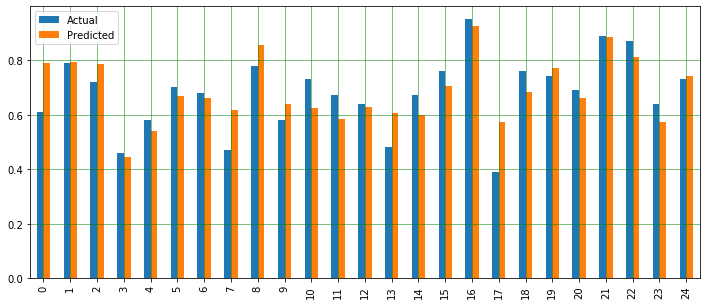

In [74]:
df5.head(25).plot(kind = 'bar', figsize = (12,5))
plt.grid(which = 'major', linestyle = '-', linewidth = '0.5', color = 'green')
plt.grid(which = 'minor', linestyle = ':', linewidth = '0.5', color = 'black')
plt.show()

#### Evaluating Model

In [75]:
MAE5 = metrics.mean_absolute_error(y5_test, y5_pred)
MSE5 = metrics.mean_squared_error(y5_test, y5_pred)
RMSE5 = np.sqrt(metrics.mean_squared_error(y5_test, y5_pred))
R2_5 = round(metrics.r2_score(y5_test, y5_pred), 2)
mean_target5 = df5_adm['Chance of Admit'].mean()

In [76]:
print('Mean Absolute Error :', MAE5)
print('Mean Squared Error :', MSE5)
print('Root Mean Squared Error :', RMSE5)

Mean Absolute Error : 0.05583523547731972
Mean Squared Error : 0.005336268653582519
Root Mean Squared Error : 0.0730497683335308


In [77]:
print('Percentage of Error by MAE', round(MAE5 / mean_target5 * 100, 2), '%')
print('Percentage of Error by RMSE', round(RMSE5 / mean_target5 * 100, 2), '%')
print('R2 Score:', R2_5)

Percentage of Error by MAE 7.69 %
Percentage of Error by RMSE 10.06 %
R2 Score: 0.7


### SUMMARY 
### Comparing Y Actual & Y Predict

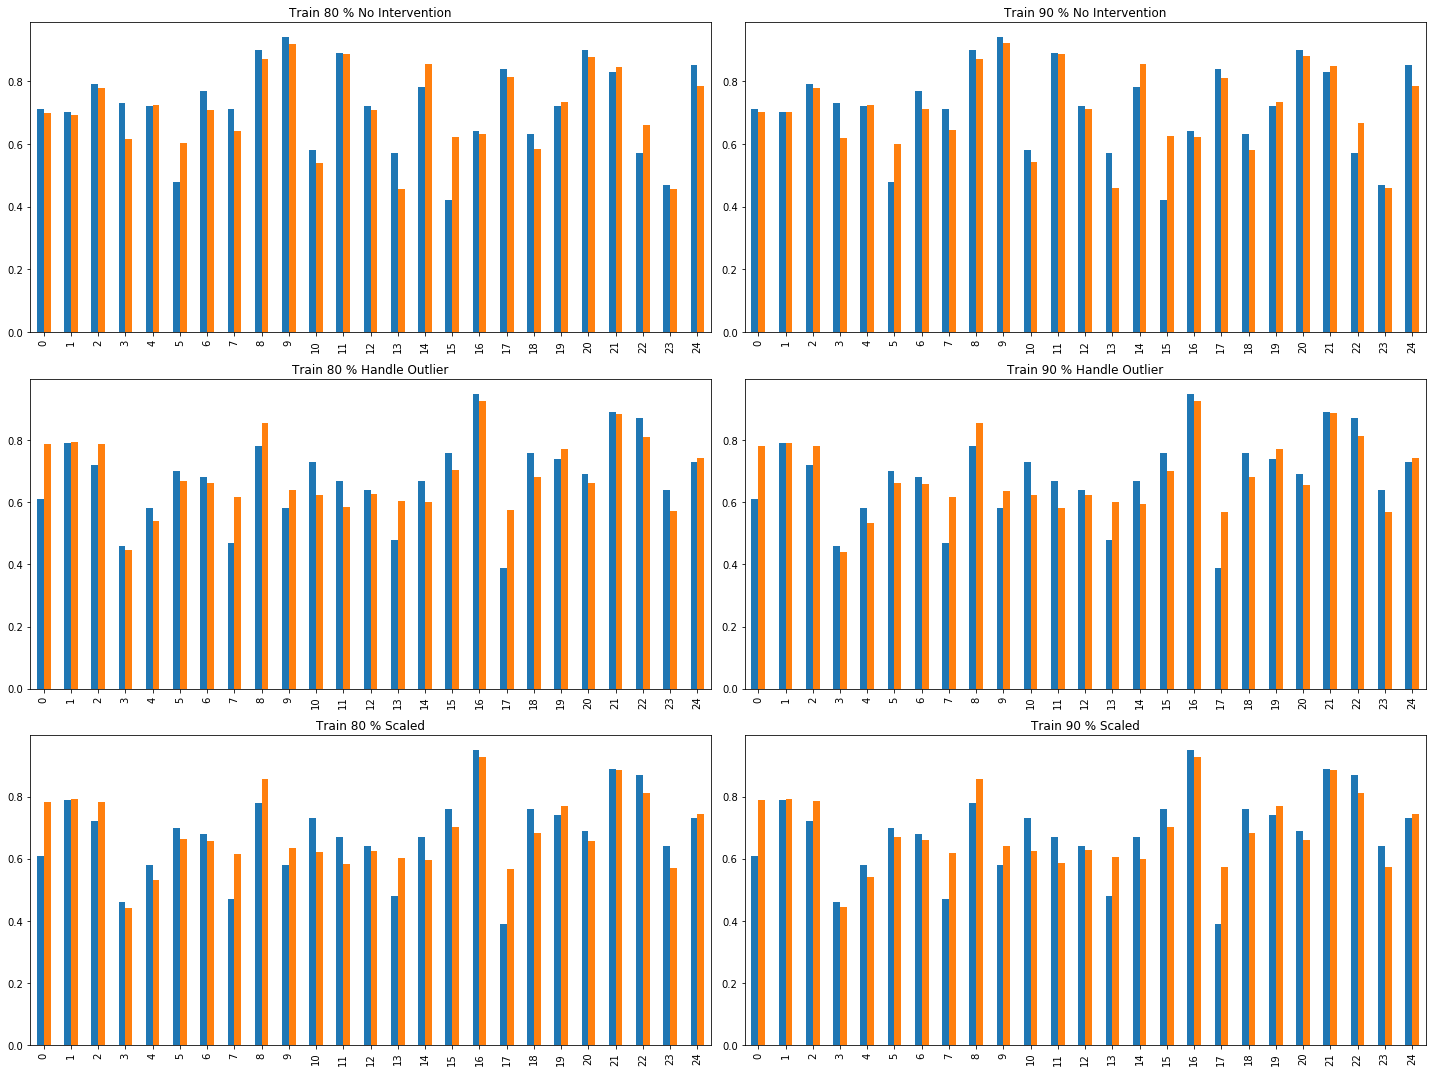

In [78]:
fig, ax = plt.subplots(3,2, figsize=(20,15))
df.head(25).plot(kind = 'bar', ax =ax[0][0], legend = False)
df3.head(25).plot(kind = 'bar', ax =ax[0][1], legend = False)
df4.head(25).plot(kind = 'bar', ax =ax[1][0], legend = False)
df1.head(25).plot(kind = 'bar', ax =ax[1][1], legend = False)
df2.head(25).plot(kind = 'bar', ax =ax[2][0], legend = False)
df5.head(25).plot(kind = 'bar', ax =ax[2][1], legend = False)
ax[0][0].set_title('Train 80 % No Intervention')
ax[0][1].set_title('Train 90 % No Intervention')
ax[1][0].set_title('Train 80 % Handle Outlier')
ax[1][1].set_title('Train 90 % Handle Outlier')
ax[2][0].set_title('Train 80 % Scaled')
ax[2][1].set_title('Train 90 % Scaled')
plt.tight_layout()

### Comparing MAE, MSE, RMSE, R2 Score + Percentages

In [79]:
df_sum = pd.DataFrame({'Method' : ['MAE', 'MSE', 'RMSE', 'R2 Score'], 
                       'T80 No Intv': [MAE, MSE, RMSE, R2], 
                       'T90 No Intv': [MAE3, MSE3, RMSE3, R2_3], 
                       'T80 No Out' : [MAE1, MSE1, RMSE1, R2_1],
                       'T90 No Out' : [MAE4, MSE4, RMSE4, R2_4], 
                       'T80 Scaled' : [MAE2, MSE2, RMSE2, R2_2], 
                       'T90 Scaled' : [MAE5, MSE5, RMSE5, R2_5]})
df_sum

,Method,T80 No Intv,T90 No Intv,T80 No Out,T90 No Out,T80 Scaled,T90 Scaled
0,MAE,0.050088,0.050936,0.051760,0.055835,0.051760,0.055835
1,MSE,0.004805,0.005291,0.004625,0.005336,0.004625,0.005336
2,RMSE,0.069319,0.072736,0.068004,0.073050,0.068004,0.073050
3,R2 Score,0.740000,0.730000,0.730000,0.700000,0.730000,0.700000


In [80]:
df_sum_pct = pd.DataFrame({'% Error' : ['by MAE', 'by RMSE'],
                           'T80 No Intv': [round(MAE / mean_target*100,2), round(RMSE / mean_target*100,2)], 
                           'T90 No Intv': [round(MAE3 / mean_target3*100,2), round(RMSE3 / mean_target3*100,2)], 
                           'T80 No Out' : [round(MAE1 / mean_target1*100,2), round(RMSE1 / mean_target1*100,2)],
                           'T90 No Out' : [round(MAE4 / mean_target4*100,2), round(RMSE4 / mean_target4*100,2)], 
                           'T80 Scaled' : [round(MAE2 / mean_target2*100,2), round(RMSE2 / mean_target2*100,2)], 
                           'T90 Scaled' : [round(MAE5 / mean_target5*100,2), round(RMSE5 / mean_target5*100,2)]})
df_sum_pct

,% Error,T80 No Intv,T90 No Intv,T80 No Out,T90 No Out,T80 Scaled,T90 Scaled
0,by MAE,6.91,7.03,7.13,7.69,7.13,7.69
1,by RMSE,9.57,10.04,9.37,10.06,9.37,10.06
